In [30]:
from matplotlib import pyplot as plt

%matplotlib inline

In [67]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
import livelossplot
from keras.utils.vis_utils import model_to_dot, plot_model

from IPython.display import SVG, display

In [45]:
# Fixed and are dependednt on the dataset
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10

In [27]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

In [59]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


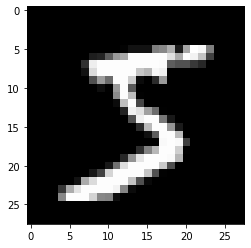

In [64]:
plt.imshow(X_train[0], cmap='gray')

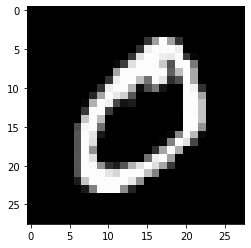

In [65]:
plt.imshow(X_train[1], cmap='gray')

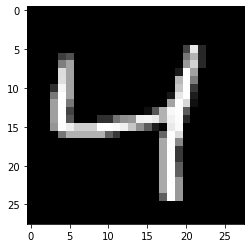

In [66]:
plt.imshow(X_train[2], cmap='gray')

In [33]:
y_train[59999]

8

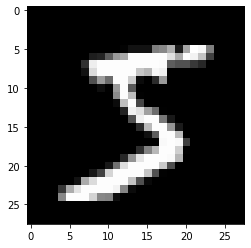

In [36]:
plt.imshow(X_train[0], cmap='gray')

In [38]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255 #Normalization
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255 # #Normalization

In [39]:
# Categorically encode labels (One hot encoding)
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [40]:
# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [53]:
# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

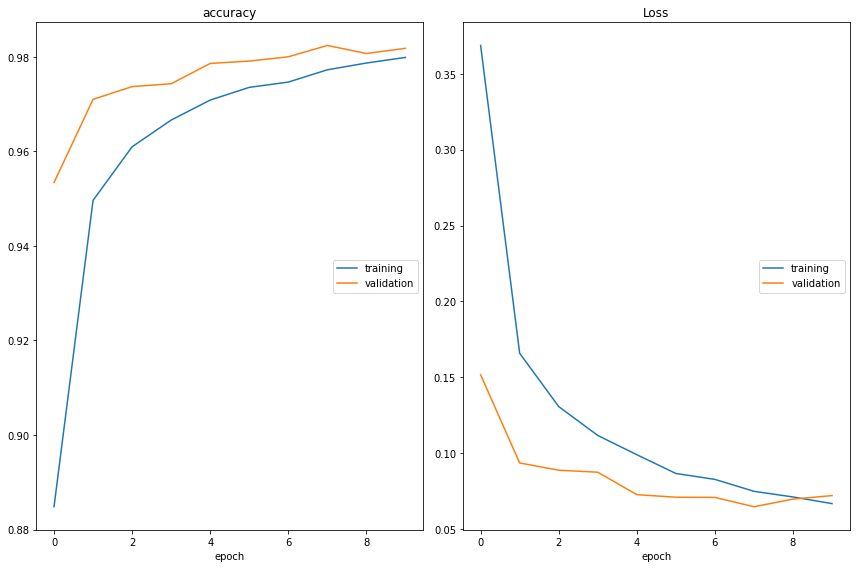

accuracy
	training         	 (min:    0.885, max:    0.980, cur:    0.980)
	validation       	 (min:    0.953, max:    0.982, cur:    0.982)
Loss
	training         	 (min:    0.067, max:    0.369, cur:    0.067)
	validation       	 (min:    0.065, max:    0.152, cur:    0.072)
300/300 [==============================] - 3s 10ms/step - loss: 0.0667 - accuracy: 0.9799 - val_loss: 0.0720 - val_accuracy: 0.9818


In [54]:
plot_losses = livelossplot.PlotLossesKeras()

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', #logloss
              metrics=['accuracy'])

#Parameters that can be changed
BATCH_SIZE = 200
EPOCHS = 10

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=[plot_losses],
          validation_data = (X_test, y_test),
          verbose=1)


In [55]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0720108300447464
Test accuracy: 0.9818000197410583


In [56]:
# Summary of neural network
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
________________________________________________

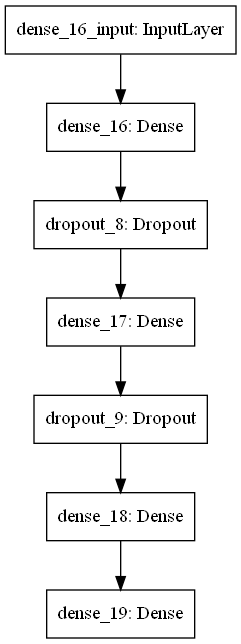

In [68]:
plot_model(model)

In [57]:
svg_model = model_to_dot(model, dpi=65)

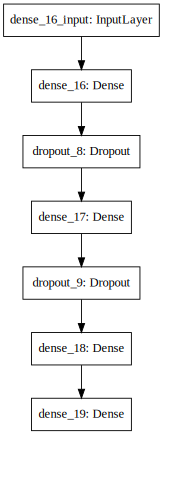

In [58]:
# Output network visualization
display(SVG(svg_model.create(prog='dot', format='svg')))